In [1]:
!pip install keras

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
!pip install tensorflow

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import os
import random
import shutil
import numpy as np
from shutil import copyfile
from PIL import Image
%matplotlib inline
import keras
from sklearn.metrics import roc_auc_score
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import math
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam,RMSprop
import tensorflow as tf
#from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt
import tensorflow.keras.losses
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [4]:
IMAGE_SIZE = [224, 224]
train_path = '/workspace/intern_parthpanday/AugSegHIV/train/'
test_path = '/workspace/intern_parthpanday/AugSegHIV/test/'
val_path = '/workspace/intern_parthpanday/AugSegHIV/val/'

In [5]:
batch_size = 16
img_height, img_width = 224,224
input_shape = (img_height, img_width, 3)

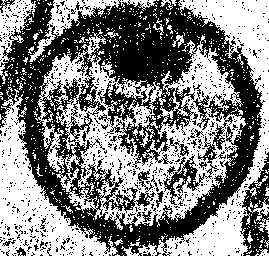

In [6]:
Image.open('/workspace/intern_parthpanday/AugSegHIV/test/eccentric/e11_0133001.png')

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,
    shear_range=0.2)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle = True,
    class_mode='categorical')


valid_datagen = ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,
    shear_range=0.2)

validation_generator = valid_datagen.flow_from_directory(
    val_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle = False,
    class_mode='categorical')


test_datagen = ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,
    shear_range=0.2)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle = False,
    class_mode='categorical')

Found 2060 images belonging to 3 classes.
Found 508 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [8]:
import keras
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
# from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers 
from tensorflow.keras import Model 
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.layers import BatchNormalization
from keras import regularizers

In [9]:
nb_train_samples = len(train_generator.filenames)
nb_validation_samples = len(validation_generator.filenames)
nb_test_samples = len(test_generator.filenames)


num_classes = len(train_generator.class_indices)

print("nb_train_samples:", nb_train_samples)
print("nb_validation_samples:", nb_validation_samples)
print("nb_test_samples:", nb_test_samples)
print("\n num_classes:", num_classes)

nb_train_samples: 2060
nb_validation_samples: 508
nb_test_samples: 150

 num_classes: 3


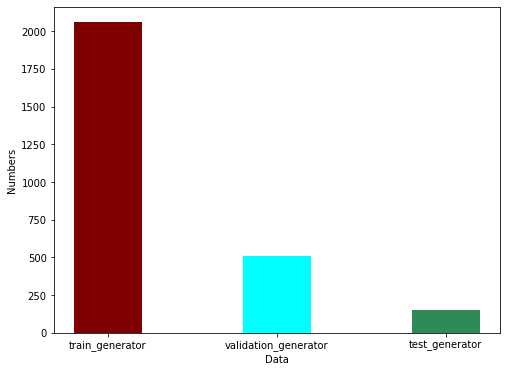

In [10]:
plt.figure(figsize=(8,6))
plt.bar(["train_generator", "validation_generator", "test_generator"], [nb_train_samples, nb_validation_samples, nb_test_samples], color=["maroon", "cyan", "seagreen"], width=0.4)
plt.xlabel("Data")
plt.ylabel("Numbers")
plt.show()

In [11]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(img_height, img_width, 3)))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(img_height, img_width, 3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.15))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.1))


model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.1))


model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same', activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
annealer = ReduceLROnPlateau(monitor='accuracy', patience=5, verbose=1)
filepath = '/temp/mymodel1.h5'
checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=True, mode='auto', save_freq='epoch')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 16)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 32)      9248      
                                                        

2022-08-03 06:03:43.153891: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-03 06:04:02.881125: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6445 MB memory:  -> device: 0, name: Tesla V100-SXM3-32GB, pci bus id: 0000:34:00.0, compute capability: 7.0
2022-08-03 06:04:02.927590: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 30509 MB memory:  -> device: 1, name: Tesla V100-SXM3-32GB, pci bus id: 0000:36:00.0, compute capability: 7.0
2022-08-03 06:04:02.968429: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0

                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 128)       0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
          

In [12]:
history = model.fit(train_generator,
             epochs=100,
             verbose=1,callbacks=[annealer, checkpoint],
             validation_data=validation_generator)                                                          

Epoch 1/100


2022-08-03 06:04:06.766113: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


129/129 [==============================] - ETA: 0s - loss: 0.8237 - accuracy: 0.6000
Epoch 1: val_loss improved from inf to 0.60461, saving model to /temp/mymodel1.h5
129/129 [==============================] - 53s 369ms/step - loss: 0.8237 - accuracy: 0.6000 - val_loss: 0.6046 - val_accuracy: 0.7559 - lr: 0.0010
Epoch 2/100
129/129 [==============================] - ETA: 0s - loss: 0.5670 - accuracy: 0.7641
Epoch 2: val_loss improved from 0.60461 to 0.56981, saving model to /temp/mymodel1.h5
129/129 [==============================] - 46s 355ms/step - loss: 0.5670 - accuracy: 0.7641 - val_loss: 0.5698 - val_accuracy: 0.7598 - lr: 0.0010
Epoch 3/100
129/129 [==============================] - ETA: 0s - loss: 0.5034 - accuracy: 0.7951
Epoch 3: val_loss did not improve from 0.56981
129/129 [==============================] - 45s 351ms/step - loss: 0.5034 - accuracy: 0.7951 - val_loss: 0.5772 - val_accuracy: 0.7362 - lr: 0.0010
Epoch 4/100
129/129 [==============================] - ETA: 0s - 

<Figure size 432x288 with 0 Axes>

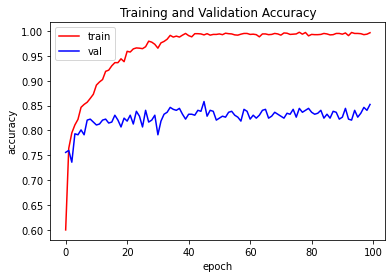

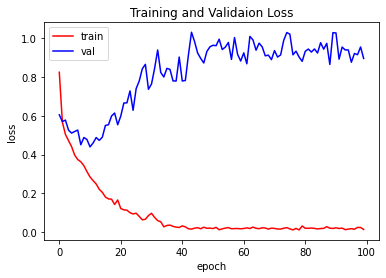

<Figure size 432x288 with 0 Axes>

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [14]:
from matplotlib import cm

In [15]:
# model.load_weights(filepath)
evl = model.evaluate(test_generator)
test_loss, test_acc = evl[0]*100, evl[1]*100
msg = f'Test Accuracy = {test_acc:5.2f} %'
print(msg)

10/10 [==============================] - 4s 315ms/step - loss: 0.8151 - accuracy: 0.9133
Test Accuracy = 91.33 %


In [56]:
test_labels = test_generator.classes
test_labels = to_categorical(test_labels, num_classes=num_classes)
y_true = [i.argmax() for i in test_labels]

predictions = model.predict(test_generator, verbose=1)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
confusion_mtx = confusion_matrix(true_classes, yPredictions) 
y_pred_probabilities=yPredictions
classnames=[]
for classname in test_generator.class_indices:
    classnames.append(classname)

target_names = classnames
print(classification_report(true_classes, yPredictions, target_names=target_names))

10/10 [==============================] - 3s 298ms/step
              precision    recall  f1-score   support

   eccentric       0.80      0.96      0.87        50
    immature       1.00      0.94      0.97        50
      mature       0.95      0.82      0.88        50

    accuracy                           0.91       150
   macro avg       0.92      0.91      0.91       150
weighted avg       0.92      0.91      0.91       150



              precision    recall  f1-score   support

           0       0.80      0.96      0.87        50
           1       1.00      0.94      0.97        50
           2       0.95      0.82      0.88        50

    accuracy                           0.91       150
   macro avg       0.92      0.91      0.91       150
weighted avg       0.92      0.91      0.91       150



[Text(0, 0.5, 'Eccentric'), Text(0, 1.5, 'Immature'), Text(0, 2.5, 'Mature')]

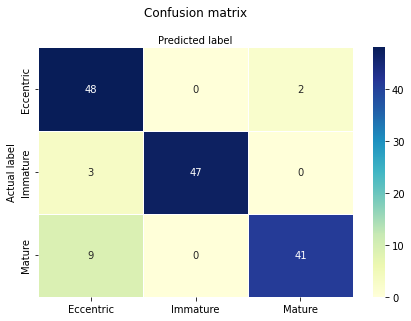

In [57]:
from sklearn.metrics import classification_report
import seaborn as sns
import sklearn
import pandas as pd
print(classification_report( true_classes, yPredictions))

cm_matrix = sklearn.metrics.confusion_matrix(true_classes, yPredictions)
cm_matrix
class_names=('eccentric', 'immature', 'mature') # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_matrix), annot=True,linewidths=.5, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ax.xaxis.set_ticklabels(['Eccentric', 'Immature', 'Mature'])
ax.yaxis.set_ticklabels(['Eccentric', 'Immature', 'Mature'])

In [58]:
#UPDATE
from sklearn.metrics import confusion_matrix
total=sum(sum(confusion_mtx))

sensitivity = confusion_mtx[0,0]/(confusion_mtx[0,0]+confusion_mtx[1,0])
print('Sensitivity : ', sensitivity*100 )

Specificity = confusion_mtx[1,1]/(confusion_mtx[1,1]+confusion_mtx[0,1])
print('Specificity : ', Specificity*100 )

Sensitivity :  94.11764705882352
Specificity :  100.0
